**Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

**Downloading dataset**

In [ ]:
!gdown 1wbh_fHaW4-aisVvAZMzcoY_SK1i8Pe9p

Downloading...
From: https://drive.google.com/uc?id=1wbh_fHaW4-aisVvAZMzcoY_SK1i8Pe9p
To: /content/4K_House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 117MB/s]


**Reading dataset**

In [ ]:
data = pd.read_csv("4K_House_Rent_Dataset.csv")
# data.head()
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
data.shape

(4746, 12)

**Manipulating Dataset**

In [ ]:
Y = data['Rent'].values
X1 = data['BHK'].values
X2 = data['Size'].values
X3 = data['Bathroom'].values
X4 = data['Furnishing Status'].values

In [ ]:
def feature_replace_by_value(input_list, replacing_item, replaced_value):
  return [replaced_value if item == replacing_item else item for item in input_list]

X4 = feature_replace_by_value(X4,'Unfurnished',1)
X4 = feature_replace_by_value(X4,'Semi-Furnished',2)
X4 = feature_replace_by_value(X4,'Furnished',3)

print(type(X1[0]),type(X2[0]),type(X3[0]),type(X4[0]))

<class 'numpy.int64'> <class 'numpy.int64'> <class 'numpy.int64'> <class 'int'>


**Gradient Descent Calculation**

In [ ]:
theta_0, theta_1, theta_2, theta_3, theta_4 = 0,0,0,0,0

m = len(Y)
epoch = 1000
learning_rate = 0.0000001
for i in range(epoch):
  temp_0, temp_1, temp_2, temp_3, temp_4 = 0,0,0,0,0

  for j in range(m):
    temp_0 +=(theta_0 + theta_1*X1[j] + theta_2*X2[j] + theta_3*X3[j] + theta_4*X4[j] - Y[j])
    temp_1 +=(theta_0 + theta_1*X1[j] + theta_2*X2[j] + theta_3*X3[j] + theta_4*X4[j] - Y[j]) * X1[j]
    temp_2 +=(theta_0 + theta_1*X1[j] + theta_2*X2[j] + theta_3*X3[j] + theta_4*X4[j] - Y[j]) * X2[j]
    temp_3 +=(theta_0 + theta_1*X1[j] + theta_2*X2[j] + theta_3*X3[j] + theta_4*X4[j] - Y[j]) * X3[j]
    temp_4 +=(theta_0 + theta_1*X1[j] + theta_2*X2[j] + theta_3*X3[j] + theta_4*X4[j] - Y[j]) * X4[j]

  theta_0 = theta_0 - learning_rate*temp_0/m
  theta_1 = theta_1 - learning_rate*temp_1/m
  theta_2 = theta_2 - learning_rate*temp_2/m
  theta_3 = theta_3 - learning_rate*temp_3/m
  theta_4 = theta_4 - learning_rate*temp_4/m


print(theta_0,theta_1,theta_2,theta_3,theta_4)

-0.3998415555510337 0.04653019295883039 40.60496268873051 0.5873102664862643 -0.22450166386444492


In [ ]:
sum = 0
for k in range(m):
   temp_sum = theta_0 + theta_1*X1[k] + theta_2*X2[k] + theta_3*X4[k] + theta_4*X4[k] - Y[k]
   temp_sum = temp_sum * temp_sum
   sum += temp_sum

cost = sum/(2*m)
print(cost)

2558746067.384725


**Plotting**

In [ ]:
def plot(x, y, label_x, label_y, theta, theta0):
  xx = np.linspace(np.min(x), np.max(x), 10)
  yy = theta * xx + theta0
  plt.plot(xx, yy, c='#58b970', label='Regression Line')
  plt.scatter(x, y,c = "#ef5423", label = 'Scatter Plot')
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.legend()
  plt.show()

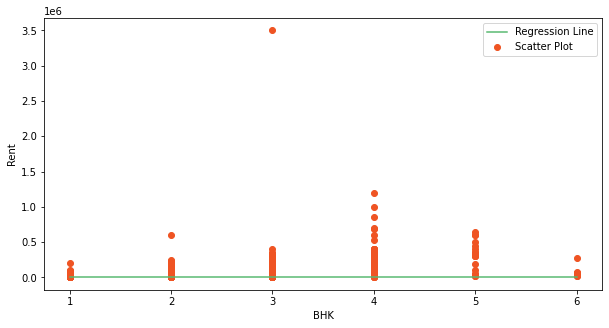

In [ ]:
plot(X1,Y,"BHK","Rent", theta_1,theta_0)

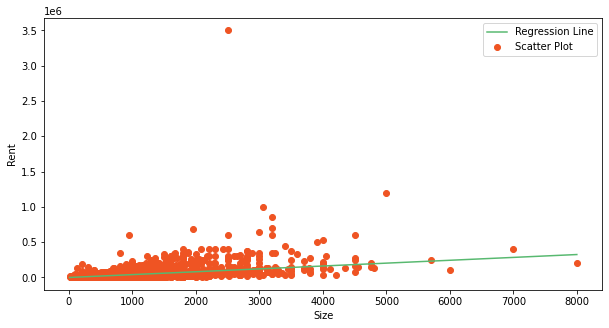

In [ ]:
plot(X2,Y,"Size","Rent", theta_2, theta_0)

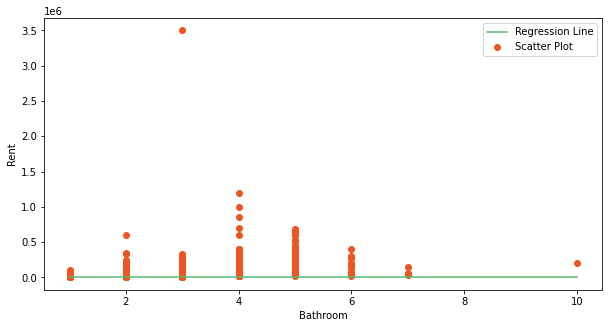

In [ ]:
plot(X3,Y,"Bathroom","Rent", theta_3, theta_0)

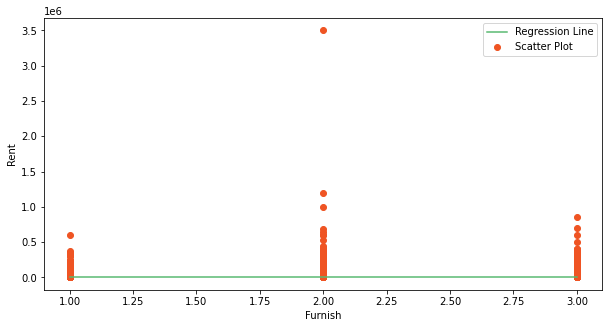

In [ ]:
plot(X4,Y,"Furnish","Rent", theta_4, theta_0)